In [140]:
#K-Najblizsich susedov
#V prvej casti sa mnozina dat delin stratifikovane no nevyuzivam metodu SMOTE
#Neskor v druhej casti pouzijem metodu SMOTE a opat aplikujem algoritmus K-Najblizsich susedov

In [141]:
#nacitanie kniznic
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs


In [237]:
#Nacitanie datasetu
data = pd.read_csv("DATA/student_prediction.csv")
#Zobrazenie hlavicky datasetu
data.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [238]:
#Vymazanie stlpca STUDENTID
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [239]:
#Zobrazenie hlavicky datasetu po premazani stlpca STUDNTID
data.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [240]:
#Zobrazenie rozmeru datasetu
data.shape

(145, 32)

In [241]:
#Vyvorenie premennej x a y, pricom x su predikujuce atributu a y je predikovany atribut GRADE
x = data.drop(['GRADE'], axis = 1)
y = data['GRADE']


In [242]:
#Rozdelenie mnoziny stratifikovane na trenovaciu a testovaciu 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)

In [243]:
#Vyvorenie a natrenovanie modelu 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [244]:
#Vypis skore modelu
classifier.score(X_test,y_test)

0.29545454545454547

In [245]:
#Vytvorenie premenej y_pred, ktora obsahuje predikovane hodnoty
y_pred = classifier.predict(X_test)

In [246]:
#vypis klasifikacneho reportu
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report( y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.44      0.64      0.52        11
           2       0.25      0.29      0.27         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3
           5       0.33      0.20      0.25         5
           6       0.40      0.50      0.44         4
           7       0.50      0.20      0.29         5

    accuracy                           0.30        44
   macro avg       0.24      0.23      0.22        44
weighted avg       0.28      0.30      0.27        44



In [247]:
#Vypis kontingencnej tabulky
crosstab = pd.crosstab(y_pred,y_test)
crosstab

GRADE,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,0,1,0,0,0,0,0,0
1,2,7,3,2,1,1,0,0
2,0,0,2,2,0,1,1,2
3,0,2,1,0,1,2,0,1
4,1,0,0,1,0,0,0,0
5,0,0,0,0,1,1,1,0
6,0,1,0,1,0,0,2,1
7,0,0,1,0,0,0,0,1


AUC for Class 1: 0.4878048780487805
AUC for Class 2: 0.7162534435261708
AUC for Class 3: 0.5463320463320464
AUC for Class 4: 0.41228070175438597
AUC for Class 5: 0.43902439024390244
AUC for Class 6: 0.6641025641025641
AUC for Class 7: 0.6625
AUC for Class 8: 0.5923076923076923


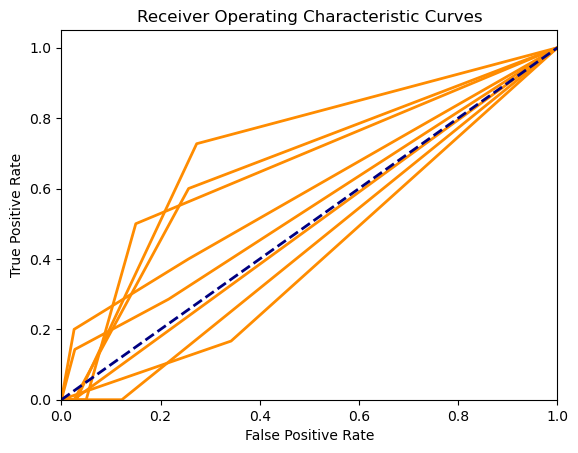

In [248]:
#Graficke zobraznie a zobrazenie hodnot AUC
y_score = classifier.predict_proba(X_test)

from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1, 2, 3, 4, 5, 6,7])
n_classes = y_test_bin.shape[1]

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Class=1, n=35 (24.138%)
Class=2, n=24 (16.552%)
Class=5, n=17 (11.724%)
Class=0, n=8 (5.517%)
Class=3, n=21 (14.483%)
Class=4, n=10 (6.897%)
Class=7, n=17 (11.724%)
Class=6, n=13 (8.966%)


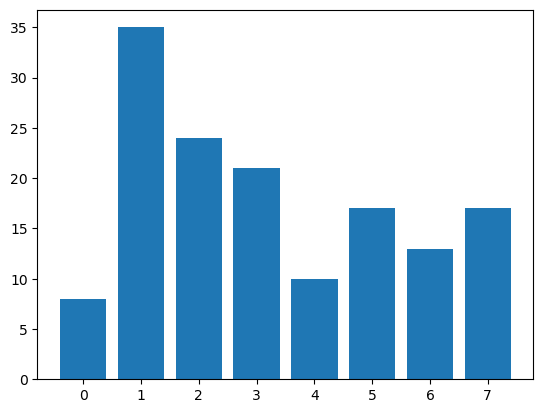

In [249]:
#Tu mozeme vidiet rozdelenie atributu GRADE, ktory je predikovany atribut
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
y = LabelEncoder().fit_transform(y)
# ciselny vypis
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [250]:
#V tejto casti uz na dataset aplikujem metodu SMOTE

In [251]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [252]:

from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

Class=1, n=35 (12.500%)
Class=2, n=35 (12.500%)
Class=5, n=35 (12.500%)
Class=0, n=35 (12.500%)
Class=3, n=35 (12.500%)
Class=4, n=35 (12.500%)
Class=7, n=35 (12.500%)
Class=6, n=35 (12.500%)


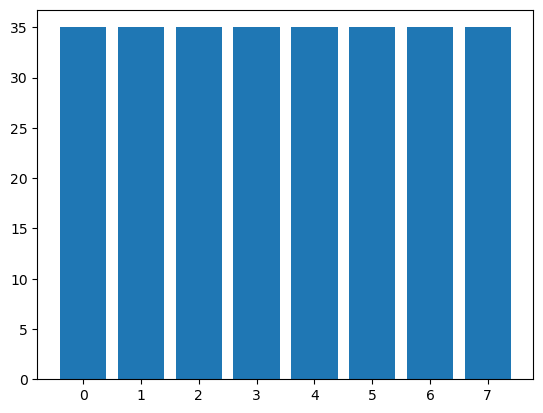

In [253]:
#Pouzitie metody SMOTE, ktora zabezpecila ze vsetky triedy mali rovnake mnozstvo poloziek
y = LabelEncoder().fit_transform(y)
# transformacia datasetu
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
# ciselny vypis distribucie hodnot
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# graf distribucie hodnot
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [254]:
#Opat stratifikovane rozdelenie mnoziny na trenovaciu a testovaciu
x_train, x_test, Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 0, stratify = y)

In [255]:
#Vytvorenie a natrenovanie modelu 2
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 2)
classifier2.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [256]:
classifier2.score(x_test,Y_test)

0.5833333333333334

In [257]:
##Vytvorenie premenej y_pred2, ktora obsahuje predikovane hodnoty
y_pred2 = classifier2.predict(x_test)

In [258]:
#Vypis klasifikacneho reportu
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report( Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.27      0.30      0.29        10
           2       0.43      0.30      0.35        10
           3       0.50      0.55      0.52        11
           4       0.62      0.73      0.67        11
           5       0.82      0.82      0.82        11
           6       0.64      0.90      0.75        10
           7       1.00      0.30      0.46        10

    accuracy                           0.58        84
   macro avg       0.61      0.58      0.57        84
weighted avg       0.61      0.58      0.57        84



In [259]:
#Vypis kontingencnej tabulky
crosstab2 = pd.crosstab(y_pred2,Y_test)
crosstab2

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,8,3,1,1,0,0,0,0
1,1,3,3,3,1,0,0,0
2,1,0,3,0,2,0,0,1
3,0,2,2,6,0,1,0,1
4,1,0,0,0,8,1,1,2
5,0,1,1,0,0,9,0,0
6,0,1,0,1,0,0,9,3
7,0,0,0,0,0,0,0,3
